In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime


mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

print()
print("train.num = ", mnist.train.num_examples)
print("test.num = ", mnist.test.num_examples)
print("validation_num = ", mnist.validation.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

train.num =  55000
test.num =  10000
validation_num =  5000


In [3]:
learning_rate = 1e-3
epochs = 30
batch_size = 100

In [4]:
X = tf.placeholder(tf.float32, [None, 784])

T = tf.placeholder(tf.float32, [None, 10])

A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])

In [5]:
W2 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
b2 = tf.Variable(tf.random_normal([32]))

C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='VALID')

Z2 = tf.nn.relu(C2 + b2)

A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [6]:
A2_flat = P2_flat = tf.reshape(A2, [-1, 13*13*32])

In [7]:
W3 = tf.Variable(tf.random_normal([13*13*32, 10]))
b3 = tf.Variable(tf.random_normal([10]))

Z3 = logits = tf.matmul(A2_flat, W3) + b3
y = A3 = tf.nn.softmax(Z3)

In [8]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z3, labels=T))

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [9]:
predicted_val = tf.equal(tf.argmax(A3, 1), tf.argmax(T, 1))

accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

predicted_list = tf.argmax(A3, 1)
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

In [10]:
index_label_prediction_list = []
C2_list = []
A2_list = []

with tf.Session() as sess:
  
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):

    total_batch = int(mnist.train.num_examples / batch_size)

    for step in range(total_batch):

      batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)

      loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})

      if step % 100 == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

        C2_val = sess.run(C2, feed_dict={X: batch_x_data, T:batch_t_data})
        A2_val = sess.run(A2, feed_dict={X: batch_x_data, T:batch_t_data})

        C2_list.append(C2_val)
        A2_list.append(A2_val)

  end_time = datetime.now()

  print("C2_shape = ", C2_val.shape, ", A2.shape = ", A2_val.shape)

  print("\n\nelapsed time = ", end_time - start_time)

  test_x_data = mnist.test.images
  test_t_data = mnist.test.labels

  accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})

  print("\nAccuracy = ", accuracy_val)
  print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
  print("index_label.shape = ", index_label.shape)
    
  index_label_list = list(index_label)
  print("length of index_label_list = ", len(index_label_list))
  print("false label count = ", index_label_list.count([0]))
        
  temp_list = [] 
    
  for index in range(len(index_label)):
        
      if index_label[index] == 0:
            
          temp_list.append(index)
          temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
          temp_list.append(predicted_list_val[index])
            
          index_label_prediction_list.append(temp_list)
            
          temp_list = []
            
  print("\nlength of index_label_false_list", len(index_label_prediction_list))

epochs =  0 , step =  0 , loss_val =  156.29752
epochs =  0 , step =  100 , loss_val =  2.2251208
epochs =  0 , step =  200 , loss_val =  1.6236312
epochs =  0 , step =  300 , loss_val =  1.6039413
epochs =  0 , step =  400 , loss_val =  1.2812638
epochs =  0 , step =  500 , loss_val =  1.2409375
epochs =  1 , step =  0 , loss_val =  1.5867298
epochs =  1 , step =  100 , loss_val =  1.008727
epochs =  1 , step =  200 , loss_val =  1.1568812
epochs =  1 , step =  300 , loss_val =  0.9371924
epochs =  1 , step =  400 , loss_val =  1.0281883
epochs =  1 , step =  500 , loss_val =  0.9304237
epochs =  2 , step =  0 , loss_val =  0.7995713
epochs =  2 , step =  100 , loss_val =  0.79265475
epochs =  2 , step =  200 , loss_val =  0.8974068
epochs =  2 , step =  300 , loss_val =  0.7425033
epochs =  2 , step =  400 , loss_val =  0.7438478
epochs =  2 , step =  500 , loss_val =  0.71717805
epochs =  3 , step =  0 , loss_val =  0.43298554
epochs =  3 , step =  100 , loss_val =  0.6035417
epochs

In [11]:
print(index_label_prediction_list)

[[33, 4, 0], [73, 9, 7], [78, 9, 8], [92, 9, 4], [149, 2, 9], [193, 9, 3], [259, 6, 0], [313, 3, 5], [320, 9, 7], [321, 2, 7], [324, 0, 5], [340, 5, 3], [359, 9, 4], [435, 8, 7], [445, 6, 0], [448, 9, 8], [449, 3, 5], [450, 3, 5], [479, 9, 8], [511, 4, 8], [515, 3, 8], [551, 7, 3], [578, 3, 8], [582, 8, 2], [610, 4, 8], [613, 2, 8], [619, 1, 8], [659, 2, 8], [684, 7, 3], [689, 7, 4], [691, 8, 4], [717, 0, 6], [720, 5, 8], [726, 7, 5], [738, 2, 8], [740, 4, 9], [839, 8, 3], [844, 8, 7], [881, 4, 9], [898, 7, 3], [924, 2, 7], [939, 2, 0], [947, 8, 9], [950, 7, 9], [956, 1, 5], [965, 6, 0], [1012, 7, 9], [1014, 6, 5], [1039, 7, 4], [1062, 3, 9], [1068, 8, 4], [1107, 9, 3], [1112, 4, 6], [1114, 3, 8], [1124, 8, 5], [1153, 6, 5], [1156, 7, 8], [1159, 4, 8], [1182, 6, 8], [1206, 7, 2], [1217, 9, 7], [1226, 7, 2], [1232, 9, 4], [1247, 9, 0], [1252, 5, 3], [1256, 2, 7], [1260, 7, 1], [1263, 4, 9], [1283, 7, 2], [1299, 5, 7], [1319, 8, 3], [1325, 8, 6], [1326, 7, 2], [1337, 2, 6], [1364, 8, 2],

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

len of index_label_prediction_list =>  482 , false_data_index =>  129


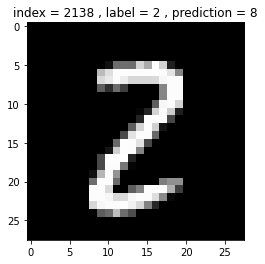

In [13]:
false_data_index = np.random.randint(len(index_label_prediction_list))

print('len of index_label_prediction_list => ', len(index_label_prediction_list), ', false_data_index => ', false_data_index)

mnist_index = index_label_prediction_list[false_data_index][0]
label = index_label_prediction_list[false_data_index][1]
prediction = index_label_prediction_list[false_data_index][2]

title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

img = test_x_data[mnist_index].reshape(28,28)


plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()

In [14]:
C2_list

Output hidden; open in https://colab.research.google.com to view.